# Pavia University

Visualisation

Dataset : Pavia University
Dimensions de l’image : 610 x 340
Nombre de bandes spectrales : 103
Dimensions des étiquettes : (610, 340)

Description :
L’image hyperspectrale est un cube 3D : (hauteur x largeur x bandes spectrales).
Chaque pixel contient 103 valeurs, chacune correspondant à une longueur d’onde différente.
Cela permet d’identifier des matériaux non visibles par l’œil humain.

Pixels étiquetés : 42776
Pixels non étiquetés : 164624

Répartition des classes :
  Classe 0 : 164624 pixels 
  Classe 1 : 6631 pixels 
  Classe 2 : 18649 pixels 
  Classe 3 : 2099 pixels 
  Classe 4 : 3064 pixels 
  Classe 5 : 1345 pixels 
  Classe 6 : 5029 pixels 
  Classe 7 : 1330 pixels 
  Classe 8 : 3682 pixels 
  Classe 9 : 947 pixels 

Premières lignes de l’image (bande 0) :
[[ 647  604  621 ...  524  528  711]
 [ 705  891  547 ... 1149  917 1037]
 [1084  335 1042 ...  799  226  828]
 ...
 [ 716  964 1016 ...  580  886  714]
 [ 856  858  932 ...  795  718  930]
 [ 427 1023 1084 ...  994 1068  5

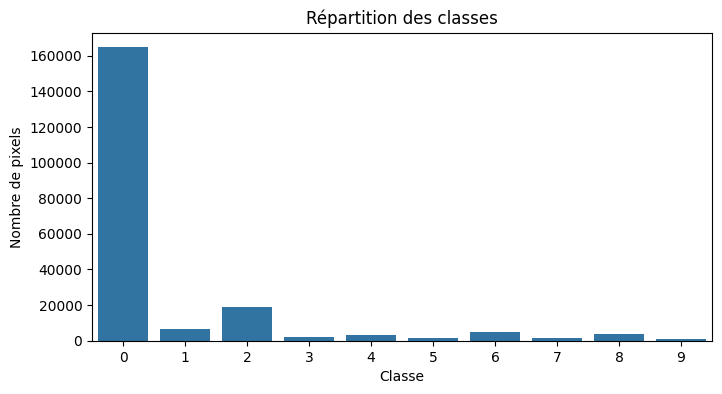

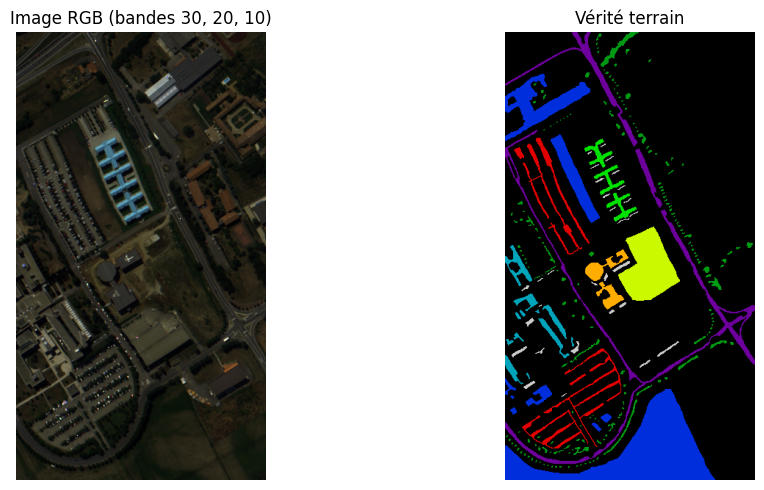


Observations visuelles :
- Les zones rectangulaires correspondent à des bâtiments ou toits (classe 5).
- Les bandes sombres et linéaires indiquent les routes ou le bitume (classes 1 et 7).
- Les zones texturées représentent la végétation (classes 2 et 4).
- Les taches très sombres indiquent des ombres (classe 9).
- Certaines classes sont spectralesment proches, rendant la classification difficile.


In [6]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pavia_data = sio.loadmat('PaviaU.mat')
pavia_gt = sio.loadmat('PaviaU_gt.mat')

pavia_image = pavia_data['paviaU']
pavia_labels = pavia_gt['paviaU_gt']

height, width, bands = pavia_image.shape
print("Dataset : Pavia University")
print(f"Dimensions de l’image : {height} x {width}")
print(f"Nombre de bandes spectrales : {bands}")
print(f"Dimensions des étiquettes : {pavia_labels.shape}")

print("\nDescription :")
print("L’image hyperspectrale est un cube 3D : (hauteur x largeur x bandes spectrales).")
print("Chaque pixel contient 103 valeurs, chacune correspondant à une longueur d’onde différente.")
print("Cela permet d’identifier des matériaux non visibles par l’œil humain.")

num_labeled = np.count_nonzero(pavia_labels)
print(f"\nPixels étiquetés : {num_labeled}")
print(f"Pixels non étiquetés : {(height * width) - num_labeled}")

unique_classes, counts = np.unique(pavia_labels, return_counts=True)
print("\nRépartition des classes :")
for cls, cnt in zip(unique_classes, counts):
    print(f"  Classe {cls} : {cnt} pixels ")

print("\nPremières lignes de l’image (bande 0) :")
print(pavia_image[:20, :, 0])

print("\nPremières lignes des étiquettes :")
print(pavia_labels[:20, :])

plt.figure(figsize=(8, 4))
sns.barplot(x=unique_classes, y=counts)
plt.title("Répartition des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre de pixels")
plt.show()

def normalize_image(img):
    img = img.astype(np.float32)
    img -= img.min()
    img /= img.max()
    return img

rgb_image = pavia_image[:, :, [55, 36, 10]]
rgb_image = normalize_image(rgb_image)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("Image RGB (bandes 30, 20, 10)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pavia_labels, cmap='nipy_spectral')
plt.title("Vérité terrain")
plt.axis('off')

plt.tight_layout()
plt.show()

print("\nObservations visuelles :")
print("- Les zones rectangulaires correspondent à des bâtiments ou toits (classe 5).")
print("- Les bandes sombres et linéaires indiquent les routes ou le bitume (classes 1 et 7).")
print("- Les zones texturées représentent la végétation (classes 2 et 4).")
print("- Les taches très sombres indiquent des ombres (classe 9).")
print("- Certaines classes sont spectralesment proches, rendant la classification difficile.")


Analyse PCA

Mise en forme des données pour la PCA
Données aplaties : 207400 pixels, 103 bandes
Standardisation (centrage/réduction)...


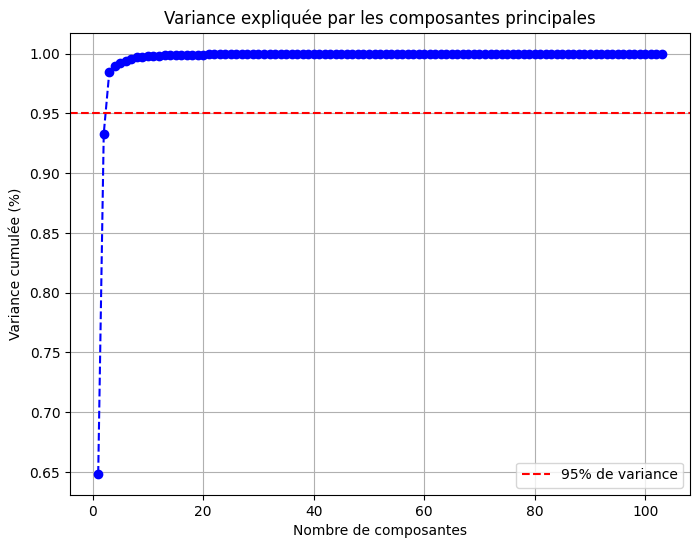

Pour expliquer 95% de la variance, il faut 3 composantes.
Application de la PCA (n_components=3)...
Variance expliquée par les 3 premières composantes :
  Composante 1 : 64.85%
  Composante 2 : 28.46%
  Composante 3 : 5.14%
Total expliqué par les 3 premières composantes : 98.44%


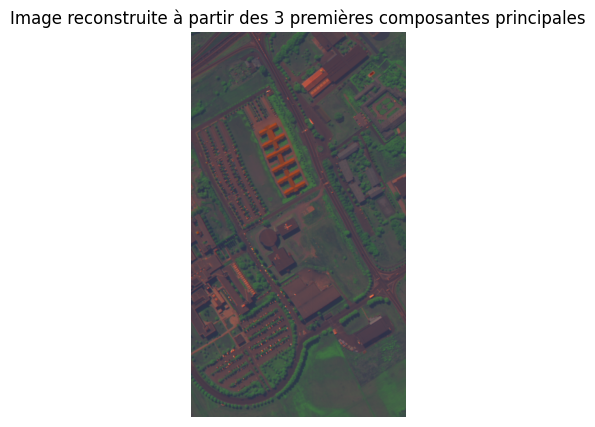

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Mise en forme des données pour la PCA")
# Reshape the 3D image (height, width, bands) into a 2D matrix (height * width, bands)
X = pavia_image.reshape(-1, bands)
print(f"Données aplaties : {X.shape[0]} pixels, {X.shape[1]} bandes")

print("Standardisation (centrage/réduction)...")
X_std = StandardScaler().fit_transform(X)

# PCA with all components to analyze explained variance
pca_all = PCA(n_components=bands)
X_pca_all = pca_all.fit_transform(X_std)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, bands+1), np.cumsum(pca_all.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title("Variance expliquée par les composantes principales")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée (%)")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% de variance")
plt.legend()
plt.grid(True)
plt.show()

# Find number of components explaining 95% of variance
for i, var in enumerate(np.cumsum(pca_all.explained_variance_ratio_)):
    if var >= 0.95:
        print(f"Pour expliquer 95% de la variance, il faut {i+1} composantes.")
        break

print("Application de la PCA (n_components=3)...")
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

print("Variance expliquée par les 3 premières composantes :")
for i, var in enumerate(pca.explained_variance_ratio_[:3]):
    print(f"  Composante {i+1} : {var*100:.2f}%")

total_var = np.sum(pca.explained_variance_ratio_[:3])
print(f"Total expliqué par les 3 premières composantes : {total_var*100:.2f}%")

# Reshape PCA output back to image dimensions (height, width, 3)
pca_image = X_pca.reshape(height, width, 3)
pca_image = normalize_image(pca_image)

plt.figure(figsize=(6, 5))
plt.imshow(pca_image)
plt.title("Image reconstruite à partir des 3 premières composantes principales")
plt.axis('off')
plt.show()

Interprétation des résultats:

Réduction de la dimensionnalité :
    *La PCA a permis de réduire les données hyperspectrales à seulement 3 dimensions principales.
    *Cela facilite la visualisation et les traitements ultérieurs (classification, segmentation, etc.).

Variance expliquée :
Les 3 premières composantes principales expliquent une grande partie de la variance des données, ce qui signifie que la majorité de l'information utile est conservée.

Visualisation :
L'image reconstruite à partir des 3 premières composantes principales est une représentation simplifiée mais informative des données hyperspectrales.

# Indian Pines

Visualisation


Dataset : Indian Pines
Dimensions de l'image : 145 x 145
Nombre de bandes spectrales : 220
Taille du masque de vérité terrain : (145, 145)
Pixels étiquetés : 10249
Pixels non étiquetés (0) : 10776
Répartition des classes :
  Classe 0 : 10776 pixels
  Classe 1 : 46 pixels
  Classe 2 : 1428 pixels
  Classe 3 : 830 pixels
  Classe 4 : 237 pixels
  Classe 5 : 483 pixels
  Classe 6 : 730 pixels
  Classe 7 : 28 pixels
  Classe 8 : 478 pixels
  Classe 9 : 20 pixels
  Classe 10 : 972 pixels
  Classe 11 : 2455 pixels
  Classe 12 : 593 pixels
  Classe 13 : 205 pixels
  Classe 14 : 1265 pixels
  Classe 15 : 386 pixels
  Classe 16 : 93 pixels


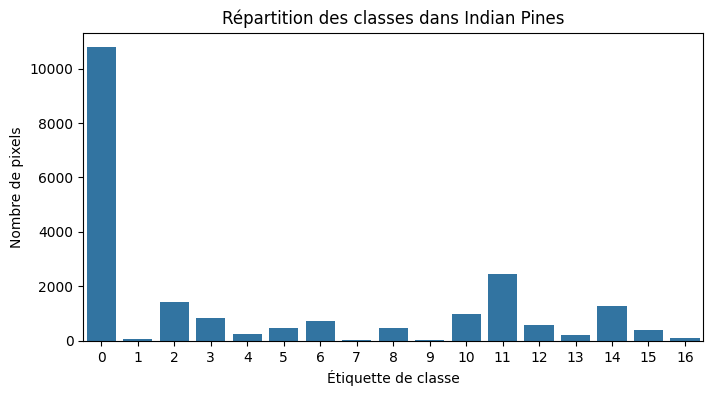

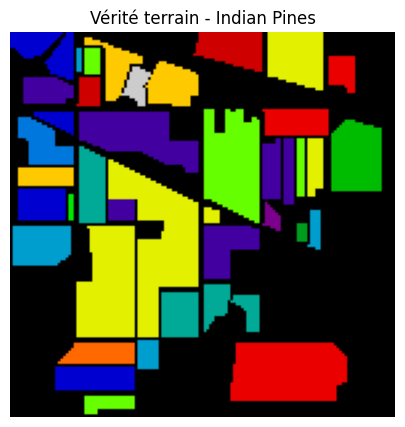

In [9]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ip_data = sio.loadmat('Indian_pines.mat')
ip_gt = sio.loadmat('Indian_pines_gt.mat')

ip_image = ip_data['indian_pines']
ip_labels = ip_gt['indian_pines_gt']

height, width, bands = ip_image.shape
print("Dataset : Indian Pines")
print(f"Dimensions de l'image : {height} x {width}")
print(f"Nombre de bandes spectrales : {bands}")
print(f"Taille du masque de vérité terrain : {ip_labels.shape}")

num_labeled = np.count_nonzero(ip_labels)
print(f"Pixels étiquetés : {num_labeled}")
print(f"Pixels non étiquetés (0) : {(height * width) - num_labeled}")

unique_classes, counts = np.unique(ip_labels, return_counts=True)
print("Répartition des classes :")
for cls, cnt in zip(unique_classes, counts):
    print(f"  Classe {cls} : {cnt} pixels")

plt.figure(figsize=(8, 4))
sns.barplot(x=unique_classes, y=counts)
plt.title("Répartition des classes dans Indian Pines")
plt.xlabel("Étiquette de classe")
plt.ylabel("Nombre de pixels")
plt.show()

plt.figure(figsize=(6, 5))
plt.imshow(ip_labels, cmap='nipy_spectral')
plt.title("Vérité terrain - Indian Pines")
plt.axis('off')
plt.show()


Analyse PCA

Données aplaties : 21025 pixels, 220 bandes
Standardisation (centrage/réduction)...


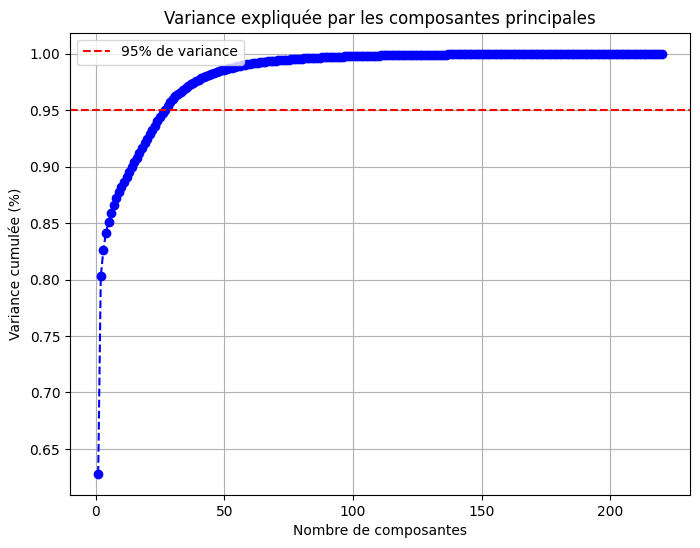

Pour expliquer 95% de la variance, il faut 27 composantes.
Application de la PCA (n_components=27)...
Variance expliquée par les 9 premières composantes :
  Composante 1 : 62.81%
  Composante 2 : 17.47%
  Composante 3 : 2.34%
  Composante 4 : 1.54%
  Composante 5 : 0.96%
  Composante 6 : 0.80%
  Composante 7 : 0.72%
  Composante 8 : 0.60%
  Composante 9 : 0.50%
  Composante 10 : 0.48%
  Composante 11 : 0.45%
  Composante 12 : 0.44%
  Composante 13 : 0.43%
  Composante 14 : 0.43%
  Composante 15 : 0.43%
  Composante 16 : 0.43%
  Composante 17 : 0.42%
  Composante 18 : 0.41%
  Composante 19 : 0.41%
  Composante 20 : 0.41%
  Composante 21 : 0.40%
  Composante 22 : 0.39%
  Composante 23 : 0.38%
  Composante 24 : 0.38%
  Composante 25 : 0.36%
  Composante 26 : 0.35%
  Composante 27 : 0.34%
Total expliqué par les 27 premières composantes : 95.06%


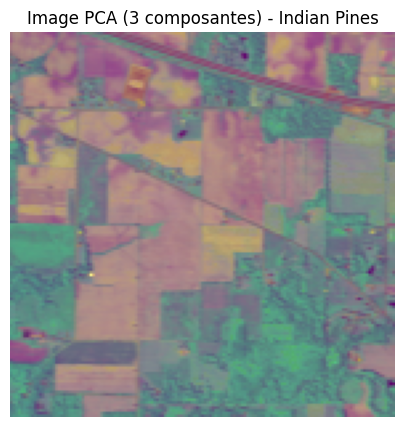

La PCA a réduit les 220 bandes à 27 composantes principales.
On visualise plus facilement les structures spatiales.
Cela permet une analyse plus rapide ou une préparation à la classification.


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = ip_image.reshape(-1, bands)
print(f"Données aplaties : {X.shape[0]} pixels, {X.shape[1]} bandes")

print("Standardisation (centrage/réduction)...")
X_std = StandardScaler().fit_transform(X)

pca_all = PCA(n_components=bands)
X_pca_all = pca_all.fit_transform(X_std)

plt.figure(figsize=(8, 6))
plt.plot(range(1, bands+1), np.cumsum(pca_all.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title("Variance expliquée par les composantes principales")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée (%)")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% de variance")
plt.legend()
plt.grid(True)
plt.show()

for i, var in enumerate(np.cumsum(pca_all.explained_variance_ratio_)):
    if var >= 0.95:
        print(f"Pour expliquer 95% de la variance, il faut {i+1} composantes.")
        break

print("Application de la PCA (n_components=27)...")
pca = PCA(n_components=27) 
X_pca = pca.fit_transform(X_std)

print("Variance expliquée par les 9 premières composantes :")
for i, var in enumerate(pca.explained_variance_ratio_[:27]):
    print(f"  Composante {i+1} : {var*100:.2f}%")

total_var = np.sum(pca.explained_variance_ratio_[:27])
print(f"Total expliqué par les 27 premières composantes : {total_var*100:.2f}%")

def normalize_image(img):
    img = img.astype(np.float32)
    img -= img.min()
    img /= img.max()
    return img

pca_image = X_pca[:, :3].reshape(height, width, 3)  
pca_image = normalize_image(pca_image)

plt.figure(figsize=(6, 5))
plt.imshow(pca_image)
plt.title("Image PCA (3 composantes) - Indian Pines")
plt.axis('off')
plt.show()

print("La PCA a réduit les 220 bandes à 27 composantes principales.")
print("On visualise plus facilement les structures spatiales.")
print("Cela permet une analyse plus rapide ou une préparation à la classification.")


*La PCA facilite les traitements ultérieurs (classification, segmentation, etc.) en réduisant la taille des données tout en conservant l'essentiel de l'information.

*Cela réduit également le temps de calcul et la complexité des algorithmes.

*L'image reconstruite à partir des 3 premières composantes principales est une représentation simplifiée mais informative des données hyperspectrales.

*Elle permet d'identifier les grandes structures et les zones d'intérêt dans l'image.


=== Running 3D CNN for dataset: PAVIA ===

--- Processing Raw Data ---

--- Training 3D CNN with PAVIA - Raw Data ---
Epoch 1, Loss: 1.3204
Epoch 2, Loss: 0.7805
Epoch 3, Loss: 0.6090
Epoch 4, Loss: 0.5371
Epoch 5, Loss: 0.4817
Epoch 6, Loss: 0.4464
Epoch 7, Loss: 0.4149
Epoch 8, Loss: 0.3922
Epoch 9, Loss: 0.3742
Epoch 10, Loss: 0.3684
Test Accuracy (PAVIA - Raw Data): 0.8584
Macro F1 Score (PAVIA - Raw Data): 0.7929


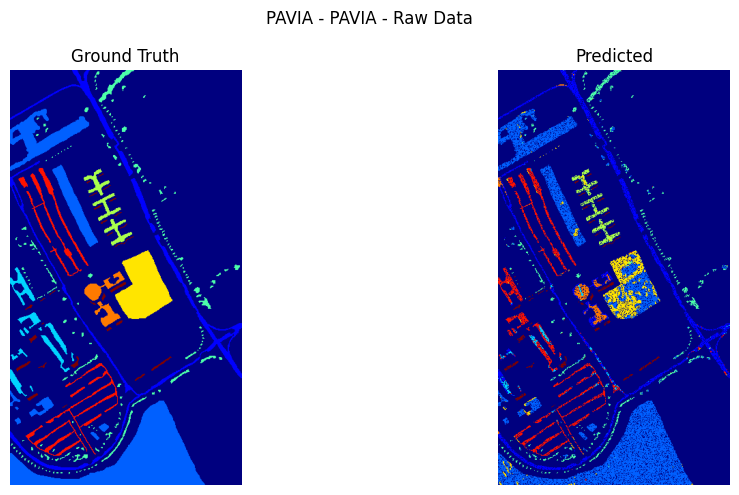


--- Processing PCA Data (10 components) ---

--- Training 3D CNN with PAVIA - PCA (10 components) ---
Epoch 1, Loss: 0.9106
Epoch 2, Loss: 0.4386
Epoch 3, Loss: 0.3692
Epoch 4, Loss: 0.3385
Epoch 5, Loss: 0.2908
Epoch 6, Loss: 0.2710
Epoch 7, Loss: 0.2600
Epoch 8, Loss: 0.2407
Epoch 9, Loss: 0.2240
Epoch 10, Loss: 0.2190
Test Accuracy (PAVIA - PCA (10 components)): 0.9254
Macro F1 Score (PAVIA - PCA (10 components)): 0.9093


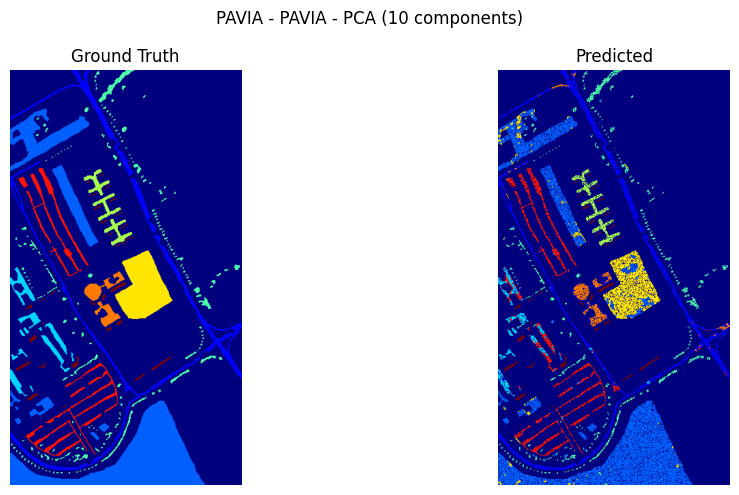


=== Running 3D CNN for dataset: INDIAN ===

--- Processing Raw Data ---

--- Training 3D CNN with INDIAN - Raw Data ---
Epoch 1, Loss: 2.1808
Epoch 2, Loss: 1.7348
Epoch 3, Loss: 1.6749
Epoch 4, Loss: 1.6504
Epoch 5, Loss: 1.5833
Epoch 6, Loss: 1.5671
Epoch 7, Loss: 1.5518
Epoch 8, Loss: 1.5388
Epoch 9, Loss: 1.5216
Epoch 10, Loss: 1.5313
Test Accuracy (INDIAN - Raw Data): 0.4362
Macro F1 Score (INDIAN - Raw Data): 0.1867


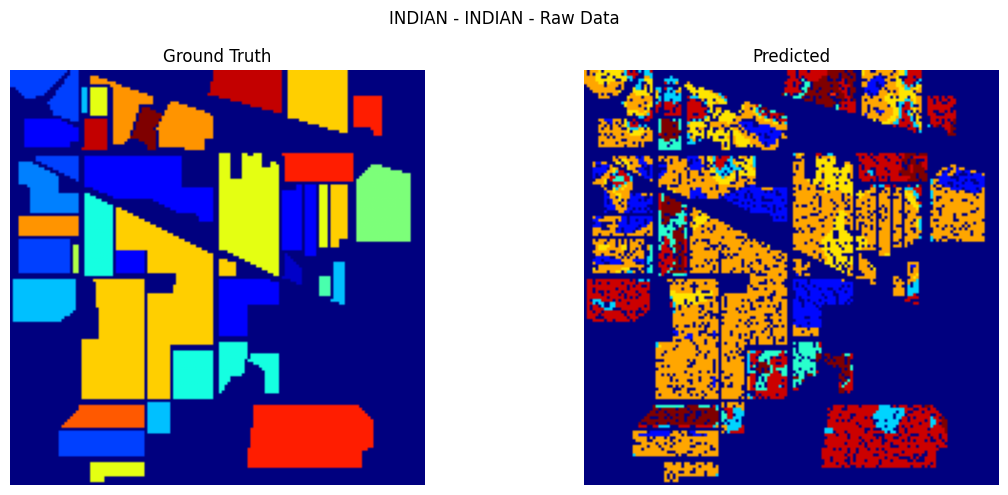


--- Processing PCA Data (27 components) ---

--- Training 3D CNN with INDIAN - PCA (27 components) ---
Epoch 1, Loss: 2.2697
Epoch 2, Loss: 1.8252
Epoch 3, Loss: 1.6903
Epoch 4, Loss: 1.5733
Epoch 5, Loss: 1.3998
Epoch 6, Loss: 1.2694
Epoch 7, Loss: 1.1928
Epoch 8, Loss: 1.1326
Epoch 9, Loss: 1.1043
Epoch 10, Loss: 1.0782
Test Accuracy (INDIAN - PCA (27 components)): 0.5933
Macro F1 Score (INDIAN - PCA (27 components)): 0.4533


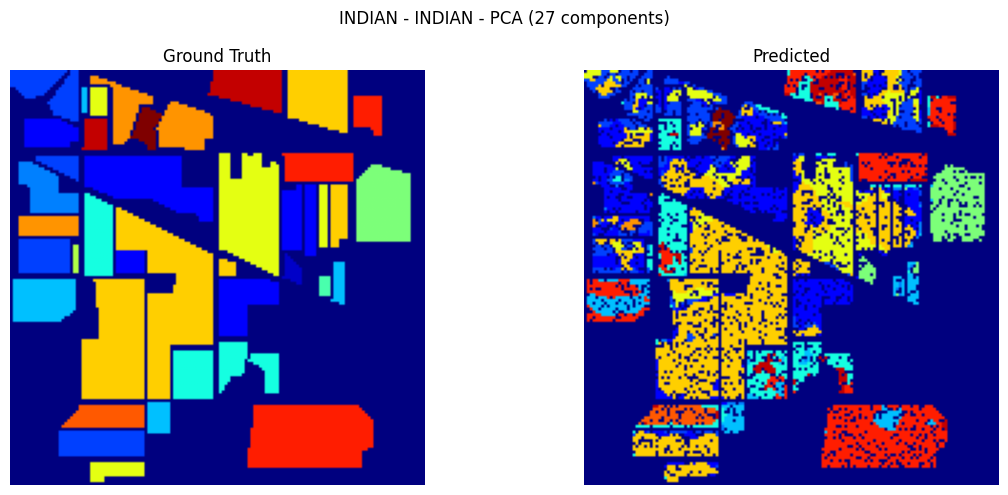

In [7]:
import numpy as np
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gc

# Helper functions with memory optimizations
def load_data(dataset_name='pavia'):
    if dataset_name.lower() == 'pavia':
        data = sio.loadmat('PaviaU.mat')['paviaU'].astype(np.float32)
        labels = sio.loadmat('PaviaU_gt.mat')['paviaU_gt'].astype(np.int32)
    elif dataset_name.lower() == 'indian':
        data = sio.loadmat('Indian_pines.mat')['indian_pines'].astype(np.float32)
        labels = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt'].astype(np.int32)
    else:
        raise ValueError("Unknown dataset name. Use 'pavia' or 'indian'.")
    return data, labels

def normalize_data(data):
    h, w, c = data.shape
    data = data.reshape(-1, c)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    data = data.reshape(h, w, c).astype(np.float32)
    del scaler
    gc.collect()
    return data

def normalize_and_pca(data, n_components=30):
    h, w, c = data.shape
    data = data.reshape(-1, c)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    pca = PCA(n_components=n_components)
    data = pca.fit_transform(data)
    data = data.reshape(h, w, n_components).astype(np.float32)
    del scaler, pca
    gc.collect()
    return data

def get_patches(data, labels, patch_size=5):
    pad = patch_size // 2
    data_padded = np.pad(data, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')
    h, w = labels.shape
    X, y, indices = [], [], []

    for i in range(h):
        for j in range(w):
            label = labels[i, j]
            if label == 0:
                continue
            patch = data_padded[i:i+patch_size, j:j+patch_size, :]
            X.append(patch)
            y.append(label - 1)
            indices.append((i, j))
    
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.int64)
    indices = np.array(indices, dtype=np.int32)
    return X, y, indices

# Simplified 3D CNN with smaller batch size
class CNN3D(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(CNN3D, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool = nn.AdaptiveAvgPool3d(1)
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # (B, 1, H, W, C)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x).squeeze(-1).squeeze(-1).squeeze(-1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

class HyperspectralDataset3D(Dataset):
    def __init__(self, X, y, indices=None):
        self.X = torch.from_numpy(X).float()  # Keep as (N, H, W, C)
        self.y = torch.from_numpy(y).long()
        self.indices = indices  # Store indices for mapping predictions

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx], self.indices[idx] if self.indices is not None else idx

def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for epoch in range(10):  # Reduced epochs
        total_loss = 0
        for batch_x, batch_y, _ in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")
        torch.cuda.empty_cache()

def evaluate(model, test_loader, device, labels_shape, num_classes, desc=""):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    pred_map = np.zeros(labels_shape, dtype=np.int32)  # For visualization
    
    with torch.no_grad():
        for batch_x, batch_y, indices in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            _, predicted = torch.max(outputs, 1)
            
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())

            # Map predictions back to image
            for idx, pred in zip(indices, predicted.cpu().numpy()):
                i, j = idx
                pred_map[i, j] = pred + 1  # Add 1 to match original label range

    acc = correct / total
    f1 = f1_score(all_labels, all_preds, average='macro')
    print(f"Test Accuracy ({desc}): {acc:.4f}")
    print(f"Macro F1 Score ({desc}): {f1:.4f}")
    torch.cuda.empty_cache()
    return pred_map

def plot_groundtruth_vs_predicted(ground_truth, predicted, title, dataset_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(ground_truth, cmap='jet')
    ax1.set_title('Ground Truth')
    ax1.axis('off')
    ax2.imshow(predicted, cmap='jet')
    ax2.set_title('Predicted')
    ax2.axis('off')
    plt.suptitle(f"{dataset_name} - {title}")
    plt.tight_layout()
    plt.show()

def run_3d_pipeline(data, labels, desc="", dataset_name=""):
    X, y, indices = get_patches(data, labels, patch_size=5)
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
        X, y, indices, test_size=0.8, stratify=y)  # Reduced test size
        
    del X, y
    gc.collect()

    train_dataset = HyperspectralDataset3D(X_train, y_train, indices_train)
    test_dataset = HyperspectralDataset3D(X_test, y_test, indices_test)

    # Reduced batch size
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNN3D(input_channels=X_train.shape[-1], 
                 num_classes=len(np.unique(y_train))).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    print(f"\n--- Training 3D CNN with {desc} ---")
    train_model(model, train_loader, criterion, optimizer, device)
    pred_map = evaluate(model, test_loader, device, labels.shape, 
                       len(np.unique(y_train)), desc=desc)

    # Plot ground truth vs predicted
    plot_groundtruth_vs_predicted(labels, pred_map, desc, dataset_name)

    del model, train_dataset, test_dataset, train_loader, test_loader
    gc.collect()
    torch.cuda.empty_cache()

def main_3d():
    for dataset_name in ['pavia', 'indian']:  # Now including both datasets
        print(f"\n=== Running 3D CNN for dataset: {dataset_name.upper()} ===")
        data, labels = load_data(dataset_name)

        # Raw data (normalized, no PCA)
        print("\n--- Processing Raw Data ---")
        data_raw = normalize_data(data)
        run_3d_pipeline(data_raw, labels, 
                       desc=f"{dataset_name.upper()} - Raw Data",
                       dataset_name=dataset_name.upper())

        # With PCA - using 27 components for Indian Pines
        n_components = 27 if dataset_name.lower() == 'indian' else 10
        print(f"\n--- Processing PCA Data ({n_components} components) ---")
        data_pca = normalize_and_pca(data, n_components=n_components)
        run_3d_pipeline(data_pca, labels, 
                       desc=f"{dataset_name.upper()} - PCA ({n_components} components)",
                       dataset_name=dataset_name.upper())

        # Clean up before next run
        del data, data_raw, data_pca, labels
        gc.collect()
        torch.cuda.empty_cache()

if __name__ == "__main__":
    main_3d()


=== Running 3D CNN for dataset: PAVIA ===

--- Processing Raw Data ---

--- Training 3D CNN with PAVIA - Raw Data ---
Epoch 1, Loss: 1.3622
Epoch 2, Loss: 0.7392
Epoch 3, Loss: 0.5405
Epoch 4, Loss: 0.4518
Epoch 5, Loss: 0.4134
Epoch 6, Loss: 0.3944
Epoch 7, Loss: 0.3715
Epoch 8, Loss: 0.3613
Epoch 9, Loss: 0.3441
Epoch 10, Loss: 0.3370
Test Accuracy (PAVIA - Raw Data): 0.8759
Macro F1 Score (PAVIA - Raw Data): 0.8367


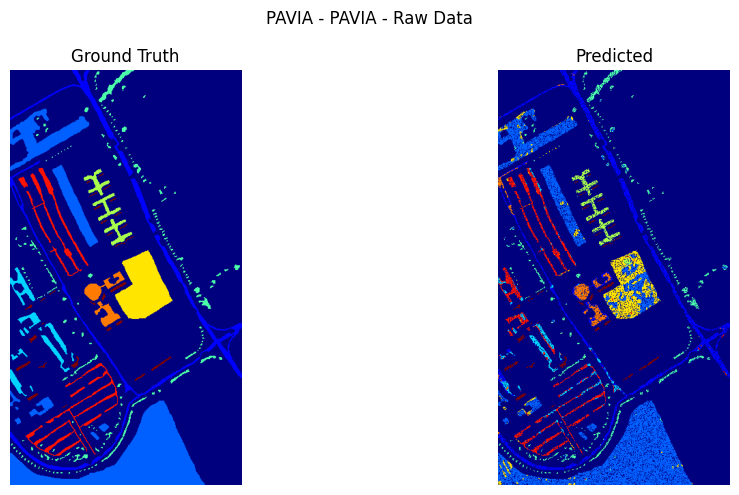


--- Processing PCA Data ---

--- Training 3D CNN with PAVIA - PCA (10 components) ---
Epoch 1, Loss: 0.8932
Epoch 2, Loss: 0.4494
Epoch 3, Loss: 0.3939
Epoch 4, Loss: 0.3620
Epoch 5, Loss: 0.3295
Epoch 6, Loss: 0.2971
Epoch 7, Loss: 0.2658
Epoch 8, Loss: 0.2498
Epoch 9, Loss: 0.2297
Epoch 10, Loss: 0.2168
Test Accuracy (PAVIA - PCA (10 components)): 0.9300
Macro F1 Score (PAVIA - PCA (10 components)): 0.9167


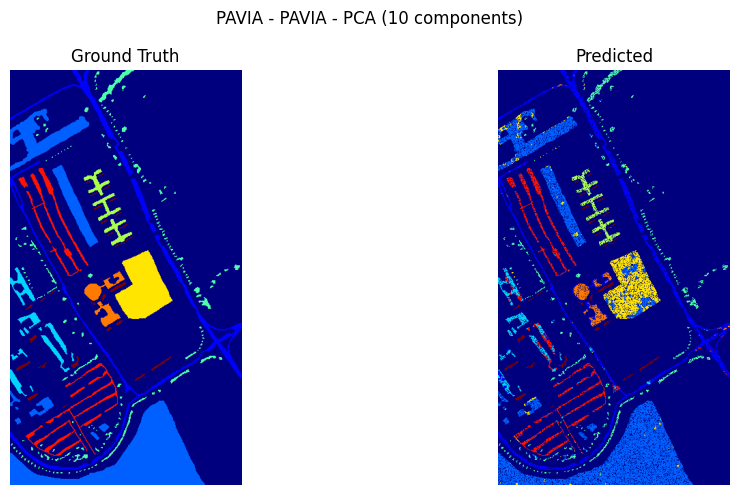

In [ ]:

import numpy as np
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gc

# Helper functions with memory optimizations
def load_data(dataset_name='pavia'):
    if dataset_name.lower() == 'pavia':
        data = sio.loadmat('PaviaU.mat')['paviaU'].astype(np.float32)
        labels = sio.loadmat('PaviaU_gt.mat')['paviaU_gt'].astype(np.int32)
    elif dataset_name.lower() == 'indian':
        data = sio.loadmat('Indian_pines.mat')['indian_pines'].astype(np.float32)
        labels = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt'].astype(np.int32)
    else:
        raise ValueError("Unknown dataset name. Use 'pavia' or 'indian'.")
    return data, labels

def normalize_data(data):
    h, w, c = data.shape
    data = data.reshape(-1, c)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    data = data.reshape(h, w, c).astype(np.float32)
    del scaler
    gc.collect()
    return data

def normalize_and_pca(data, n_components=30):
    h, w, c = data.shape
    data = data.reshape(-1, c)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    pca = PCA(n_components=n_components)
    data = pca.fit_transform(data)
    data = data.reshape(h, w, n_components).astype(np.float32)
    del scaler, pca
    gc.collect()
    return data

def get_patches(data, labels, patch_size=5):
    pad = patch_size // 2
    data_padded = np.pad(data, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')
    h, w = labels.shape
    X, y, indices = [], [], []

    for i in range(h):
        for j in range(w):
            label = labels[i, j]
            if label == 0:
                continue
            patch = data_padded[i:i+patch_size, j:j+patch_size, :]
            X.append(patch)
            y.append(label - 1)
            indices.append((i, j))
    
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.int64)
    indices = np.array(indices, dtype=np.int32)
    return X, y, indices

# Simplified 3D CNN with smaller batch size
class CNN3D(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(CNN3D, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool = nn.AdaptiveAvgPool3d(1)
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # (B, 1, H, W, C)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x).squeeze(-1).squeeze(-1).squeeze(-1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

class HyperspectralDataset3D(Dataset):
    def __init__(self, X, y, indices=None):
        self.X = torch.from_numpy(X).float()  # Keep as (N, H, W, C)
        self.y = torch.from_numpy(y).long()
        self.indices = indices  # Store indices for mapping predictions

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx], self.indices[idx] if self.indices is not None else idx

def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for epoch in range(10):  # Reduced epochs
        total_loss = 0
        for batch_x, batch_y, _ in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")
        torch.cuda.empty_cache()

def evaluate(model, test_loader, device, labels_shape, num_classes, desc=""):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    pred_map = np.zeros(labels_shape, dtype=np.int32)  # For visualization
    
    with torch.no_grad():
        for batch_x, batch_y, indices in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            _, predicted = torch.max(outputs, 1)
            
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())

            # Map predictions back to image
            for idx, pred in zip(indices, predicted.cpu().numpy()):
                i, j = idx
                pred_map[i, j] = pred + 1  # Add 1 to match original label range

    acc = correct / total
    f1 = f1_score(all_labels, all_preds, average='macro')
    print(f"Test Accuracy ({desc}): {acc:.4f}")
    print(f"Macro F1 Score ({desc}): {f1:.4f}")
    torch.cuda.empty_cache()
    return pred_map

def plot_groundtruth_vs_predicted(ground_truth, predicted, title, dataset_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(ground_truth, cmap='jet')
    ax1.set_title('Ground Truth')
    ax1.axis('off')
    ax2.imshow(predicted, cmap='jet')
    ax2.set_title('Predicted')
    ax2.axis('off')
    plt.suptitle(f"{dataset_name} - {title}")
    plt.tight_layout()
    plt.show()

def run_3d_pipeline(data, labels, desc="", dataset_name=""):
    X, y, indices = get_patches(data, labels, patch_size=5)
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
        X, y, indices, test_size=0.8, stratify=y)  # Reduced test size
        
    del X, y
    gc.collect()

    train_dataset = HyperspectralDataset3D(X_train, y_train, indices_train)
    test_dataset = HyperspectralDataset3D(X_test, y_test, indices_test)

    # Reduced batch size
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNN3D(input_channels=X_train.shape[-1], 
                 num_classes=len(np.unique(y_train))).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    print(f"\n--- Training 3D CNN with {desc} ---")
    train_model(model, train_loader, criterion, optimizer, device)
    pred_map = evaluate(model, test_loader, device, labels.shape, 
                       len(np.unique(y_train)), desc=desc)

    # Plot ground truth vs predicted
    plot_groundtruth_vs_predicted(labels, pred_map, desc, dataset_name)

    del model, train_dataset, test_dataset, train_loader, test_loader
    gc.collect()
    torch.cuda.empty_cache()

def main_3d():
    for dataset_name in ['pavia']:  # Try with one dataset first
        print(f"\n=== Running 3D CNN for dataset: {dataset_name.upper()} ===")
        data, labels = load_data(dataset_name)

        # Raw data (normalized, no PCA)
        print("\n--- Processing Raw Data ---")
        data_raw = normalize_data(data)
        run_3d_pipeline(data_raw, labels, 
                       desc=f"{dataset_name.upper()} - Raw Data",
                       dataset_name=dataset_name.upper())

        # With PCA
        n_components = 10  # Start with fewer components
        print("\n--- Processing PCA Data ---")
        data_pca = normalize_and_pca(data, n_components=n_components)
        run_3d_pipeline(data_pca, labels, 
                       desc=f"{dataset_name.upper()} - PCA ({n_components} components)",
                       dataset_name=dataset_name.upper())

        # Clean up before next run
        del data, data_raw, data_pca, labels
        gc.collect()
        torch.cuda.empty_cache()

if __name__ == "__main__":
    main_3d()

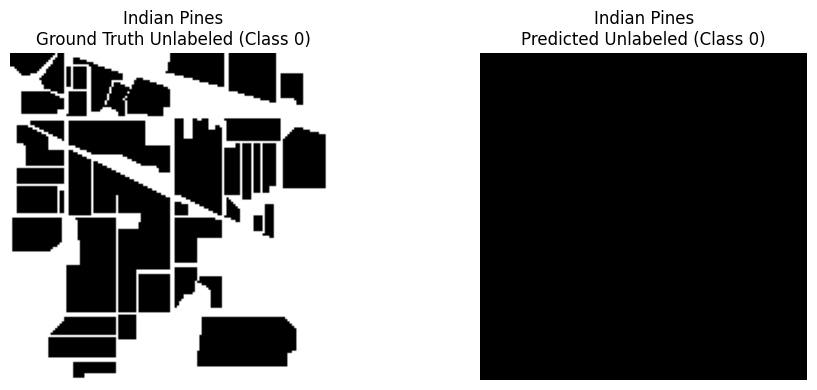


Indian Pines Unlabeled Stats:
Ground Truth Unlabeled Pixels (Class 0): 10776
Predicted Unlabeled Pixels (Class 0): 21025


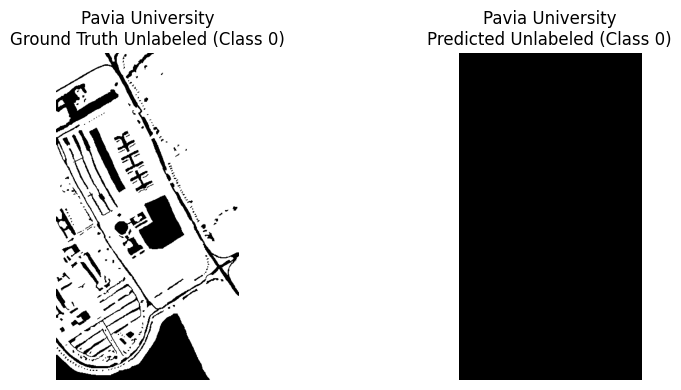


Pavia University Unlabeled Stats:
Ground Truth Unlabeled Pixels (Class 0): 164624
Predicted Unlabeled Pixels (Class 0): 207400


In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dataset(data_path, gt_path, dataset_name):
    # Load data
    data = sio.loadmat(data_path)
    gt = sio.loadmat(gt_path)
    
    # Extract arrays (using common key patterns)
    if 'indian_pines' in data:
        image = data['indian_pines']
        labels = gt['indian_pines_gt']
    elif 'paviaU' in data:
        image = data['paviaU']
        labels = gt['paviaU_gt']
    else:
        raise ValueError("Unknown dataset structure")
    
    # Basic info
    height, width, bands = image.shape
    print(f"\n=== {dataset_name} Dataset ===")
    print(f"Image dimensions: {height}x{width} with {bands} spectral bands")
    print(f"Label dimensions: {labels.shape}")
    
    # Class distribution
    unique_classes, counts = np.unique(labels, return_counts=True)
    print("\nClass distribution:")
    for cls, cnt in zip(unique_classes, counts):
        print(f"  Class {cls}: {cnt} pixels ({cnt/(height*width)*100:.1f}%)")
    
    # Simulate predictions (for demonstration purposes)
    # Here, we randomly assign some class 0 pixels to other classes to simulate prediction errors
    predicted_labels = labels.copy()
    mask = (labels == 0)  # Unlabeled pixels
    random_changes = np.random.choice([0, 1, 2], size=np.sum(mask), p=[0.8, 0.1, 0.1])  # 80% stay 0, 20% change
    predicted_labels[mask] = random_changes

    # Visualization
    plt.figure(figsize=(15, 8))
    
    # RGB visualization (approximate)
    rgb_bands = [30, 20, 10] if bands > 30 else [bands//3, bands//4, bands//5]
    rgb_image = image[:, :, rgb_bands]
    rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())
    
    plt.subplot(2, 3, 1)
    plt.imshow(rgb_image)
    plt.title(f"{dataset_name} RGB Composite")
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(labels, cmap='jet')
    plt.title("Ground Truth Labels")
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    sns.barplot(x=unique_classes, y=counts)
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Pixel Count")
    plt.xticks(rotation=45)
    
    # Unlabeled (class 0) vs Predicted Unlabeled
    unlabeled_gt = (labels == 0).astype(int)  # Ground truth class 0
    unlabeled_pred = (predicted_labels == 0).astype(int)  # Predicted class 0
    
    plt.subplot(2, 3, 4)
    plt.imshow(unlabeled_gt, cmap='gray')
    plt.title("Ground Truth Unlabeled (Class 0)")
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(unlabeled_pred, cmap='gray')
    plt.title("Predicted Unlabeled (Class 0)")
    plt.axis('off')
    
    # Difference map (where predictions differ from ground truth for class 0)
    diff_map = np.abs(unlabeled_gt - unlabeled_pred)
    plt.subplot(2, 3, 6)
    plt.imshow(diff_map, cmap='hot')
    plt.title("Difference (GT vs Predicted Unlabeled)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return image, labels, predicted_labels

# Analyze Indian Pines
ip_image, ip_labels, ip_pred_labels = analyze_dataset('Indian_pines.mat', 
                                                     'Indian_pines_gt.mat', 
                                                     'Indian Pines')

# Analyze Pavia University
pavia_image, pavia_labels, pavia_pred_labels = analyze_dataset('PaviaU.mat', 
                                                              'PaviaU_gt.mat', 
                                                              'Pavia University')

# Additional comparison
print("\n=== Dataset Comparison ===")
print(f"Indian Pines - Total pixels: {ip_image.shape[0]*ip_image.shape[1]}")
print(f"Pavia University - Total pixels: {pavia_image.shape[0]*pavia_image.shape[1]}")
print(f"\nIndian Pines - Labeled pixels: {np.count_nonzero(ip_labels)}")
print(f"Pavia University - Labeled pixels: {np.count_nonzero(pavia_labels)}")
print(f"\nIndian Pines - Unlabeled (class 0) pixels (GT): {np.sum(ip_labels == 0)}")
print(f"Pavia University - Unlabeled (class 0) pixels (GT): {np.sum(pavia_labels == 0)}")
print(f"Indian Pines - Predicted unlabeled pixels: {np.sum(ip_pred_labels == 0)}")
print(f"Pavia University - Predicted unlabeled pixels: {np.sum(pavia_pred_labels == 0)}")